In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Social Media Data for DSBA.csv')

In [3]:
data

,UserID,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,1000001,Yes,307.0,iOS and Android,38570.0,1,2,Financial,94.0,5993,8,Yes,11,No,1,0,8
1,1000002,No,367.0,iOS,9765.0,1,1,Financial,61.0,5130,1,No,23,Yes,4,1,10
2,1000003,Yes,277.0,iOS and Android,48055.0,1,2,Other,92.0,2090,6,Yes,15,No,2,0,7
3,1000004,No,247.0,iOS,48720.0,1,4,Financial,56.0,2909,1,Yes,11,No,3,0,8
4,1000005,No,202.0,iOS and Android,20685.0,1,1,Medical,40.0,3468,9,No,12,No,4,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11755,1011756,No,279.0,Laptop,30987.0,23,2,Historical site,58.0,2616,4,No,36,No,3,1,23
11756,1011757,No,305.0,Tab,21510.0,6,1,Historical site,55.0,10041,4,No,30,No,1,1,11
11757,1011758,No,214.0,Tab,5478.0,4,3,Beach,103.0,6203,3,Yes,40,Yes,2,1,12
11758,1011759,No,382.0,Laptop,35851.0,2,3,Historical site,83.0,5444,3,No,32,No,4,0,20


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11760 entries, 0 to 11759
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   UserID                                        11760 non-null  int64  
 1   Taken_product                                 11760 non-null  object 
 2   Yearly_avg_view_on_travel_page                11179 non-null  float64
 3   preferred_device                              11707 non-null  object 
 4   total_likes_on_outstation_checkin_given       11379 non-null  float64
 5   yearly_avg_Outstation_checkins                11685 non-null  object 
 6   member_in_family                              11760 non-null  object 
 7   preferred_location_type                       11729 non-null  object 
 8   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 9   total_likes_on_outofstation_checkin_received  11760 non-null 

In [5]:
data.shape

(11760, 17)

In [6]:
## numerical features
numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['UserID',
 'Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']

In [7]:
##continuous and discrete features
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature+['UserID']]

In [8]:
discrete_feature

['week_since_last_outstation_checkin',
 'travelling_network_rating',
 'Adult_flag']

In [9]:
continuous_feature

['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'montly_avg_comment_on_company_page',
 'Daily_Avg_mins_spend_on_traveling_page']

In [10]:
## categorical feature
categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['Taken_product',
 'preferred_device',
 'yearly_avg_Outstation_checkins',
 'member_in_family',
 'preferred_location_type',
 'following_company_page',
 'working_flag']

In [12]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())
cat

[array(['Yes', 'No'], dtype=object),
 array(['iOS and Android', 'iOS', 'ANDROID', nan, 'Android', 'Android OS',
        'Other', 'Others', 'Tab', 'Laptop', 'Mobile'], dtype=object),
 array(['1', '24', '23', '27', '16', '15', '26', '19', '21', '11', '10',
        '25', '12', '18', '29', nan, '22', '14', '20', '28', '17', '13',
        '*', '5', '8', '2', '3', '9', '7', '6', '4'], dtype=object),
 array(['2', '1', '4', 'Three', '3', '5', '10'], dtype=object),
 array(['Financial', 'Other', 'Medical', nan, 'Game', 'Social media',
        'Entertainment', 'Tour and Travel', 'Movie', 'OTT', 'Tour  Travel',
        'Beach', 'Historical site', 'Big Cities', 'Trekking',
        'Hill Stations'], dtype=object),
 array(['Yes', 'No', nan, '1', '0'], dtype=object),
 array(['No', 'Yes'], dtype=object)]

In [13]:
data['preferred_device'] = data['preferred_device'].replace(to_replace='ANDROID', value='Android')
data['preferred_device'] = data['preferred_device'].replace(to_replace='Android OS', value='Android')
data['preferred_device'] = data['preferred_device'].replace(to_replace='Others', value='Other')
data['preferred_device'] = data['preferred_device'].replace(to_replace='iOS and Android', value='Mobile')

data['yearly_avg_Outstation_checkins'] = data['yearly_avg_Outstation_checkins'].replace(to_replace='*', value=np.nan)

data['member_in_family'] = data['member_in_family'].replace(to_replace='Three', value='3')

data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Tour  Travel', value='Tour_and_Travel')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Tour and Travel', value='Tour_and_Travel')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Social media', value='Social_media')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Historical site', value='Historical_site')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Big Cities', value='Big_Cities')
data['preferred_location_type'] = data['preferred_location_type'].replace(to_replace='Hill Stations', value='Hill_Stations')

data['following_company_page'] = data['following_company_page'].replace(to_replace='0', value='No')
data['following_company_page'] = data['following_company_page'].replace(to_replace='1', value='Yes')

In [14]:
## Descriptive analysis

# mean
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].mean()

Yearly_avg_view_on_travel_page                    280.830844
total_likes_on_outstation_checkin_given         28170.481765
Yearly_avg_comment_on_travel_page                  74.790029
total_likes_on_outofstation_checkin_received     6531.699065
week_since_last_outstation_checkin                  3.203571
montly_avg_comment_on_company_page                 28.661565
travelling_network_rating                           2.712245
Adult_flag                                          0.793878
Daily_Avg_mins_spend_on_traveling_page             13.817432
dtype: float64

In [15]:
# median
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].median()

Yearly_avg_view_on_travel_page                    271.0
total_likes_on_outstation_checkin_given         28076.0
Yearly_avg_comment_on_travel_page                  75.0
total_likes_on_outofstation_checkin_received     4948.0
week_since_last_outstation_checkin                  3.0
montly_avg_comment_on_company_page                 22.0
travelling_network_rating                           3.0
Adult_flag                                          1.0
Daily_Avg_mins_spend_on_traveling_page             12.0
dtype: float64

In [16]:
# mode
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].mode()

,Yearly_avg_view_on_travel_page,total_likes_on_outstation_checkin_given,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,montly_avg_comment_on_company_page,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,262.0,24185.0,96.0,2377,1,23,3,0,10


In [17]:
# variance
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].var()

Yearly_avg_view_on_travel_page                  4.648916e+03
total_likes_on_outstation_checkin_given         2.069291e+08
Yearly_avg_comment_on_travel_page               5.772799e+02
total_likes_on_outofstation_checkin_received    2.215221e+07
week_since_last_outstation_checkin              6.845365e+00
montly_avg_comment_on_company_page              2.367845e+03
travelling_network_rating                       1.168317e+00
Adult_flag                                      7.256024e-01
Daily_Avg_mins_spend_on_traveling_page          8.227681e+01
dtype: float64

In [18]:
# skew
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].skew()

Yearly_avg_view_on_travel_page                  0.414409
total_likes_on_outstation_checkin_given         0.489638
Yearly_avg_comment_on_travel_page               4.868225
total_likes_on_outofstation_checkin_received    1.368578
week_since_last_outstation_checkin              0.915334
montly_avg_comment_on_company_page              7.684150
travelling_network_rating                      -0.302557
Adult_flag                                      0.968115
Daily_Avg_mins_spend_on_traveling_page          4.480682
dtype: float64

In [19]:
# standard deviation
data[['Yearly_avg_view_on_travel_page',
 'total_likes_on_outstation_checkin_given',
 'Yearly_avg_comment_on_travel_page',
 'total_likes_on_outofstation_checkin_received',
 'week_since_last_outstation_checkin',
 'montly_avg_comment_on_company_page',
 'travelling_network_rating',
 'Adult_flag',
 'Daily_Avg_mins_spend_on_traveling_page']].std()

Yearly_avg_view_on_travel_page                     68.182958
total_likes_on_outstation_checkin_given         14385.032134
Yearly_avg_comment_on_travel_page                  24.026650
total_likes_on_outofstation_checkin_received     4706.613785
week_since_last_outstation_checkin                  2.616365
montly_avg_comment_on_company_page                 48.660504
travelling_network_rating                           1.080887
Adult_flag                                          0.851823
Daily_Avg_mins_spend_on_traveling_page              9.070657
dtype: float64

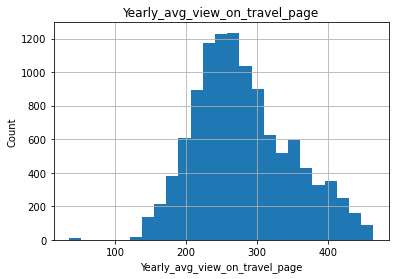

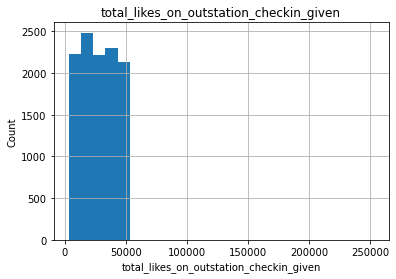

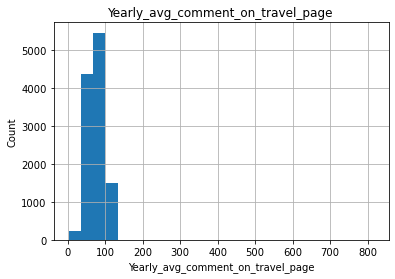

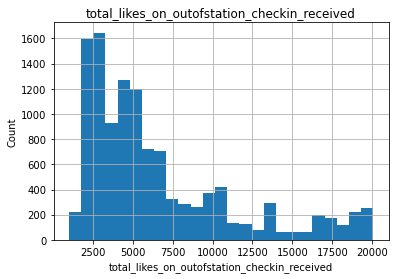

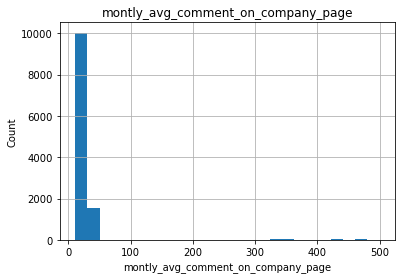

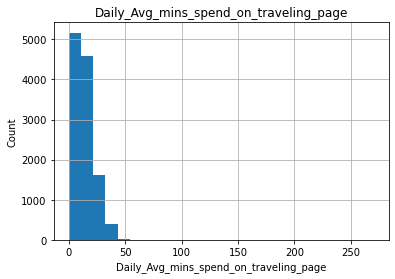

In [20]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

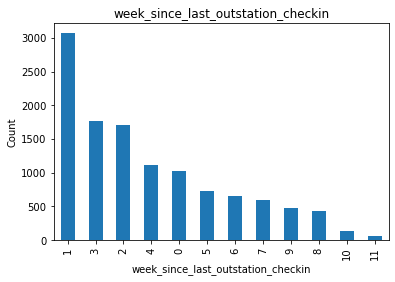

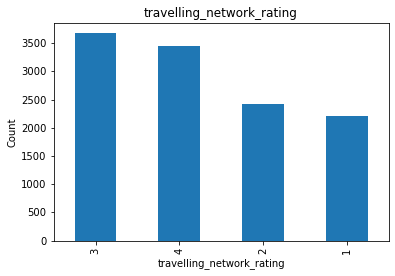

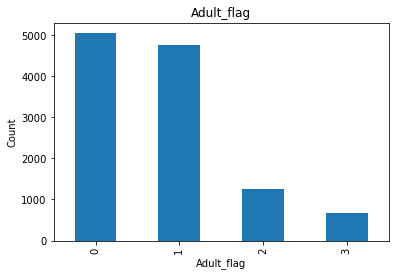

In [21]:
## Lets analyse the discrete values by creating histograms to understand the distribution

for feature in discrete_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

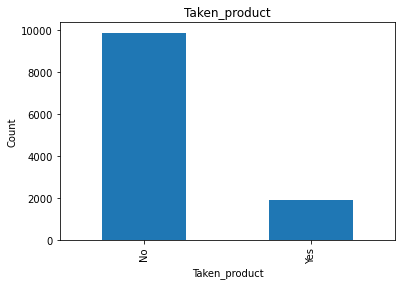

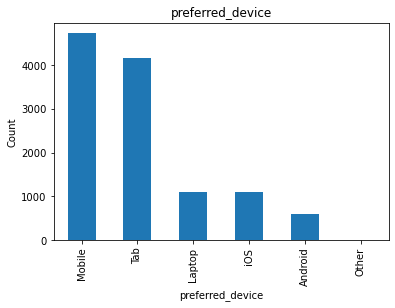

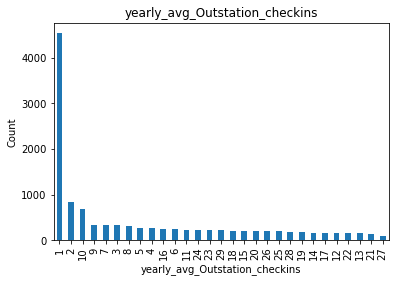

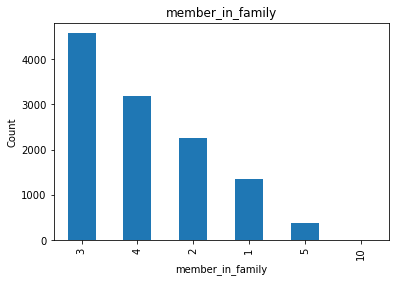

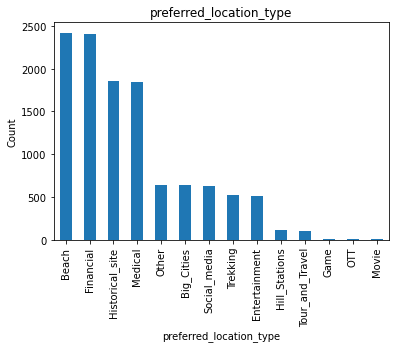

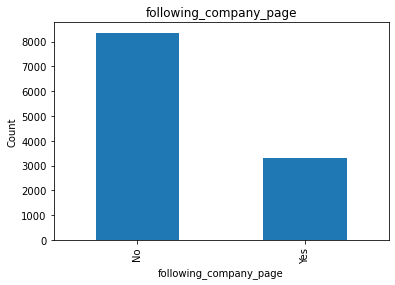

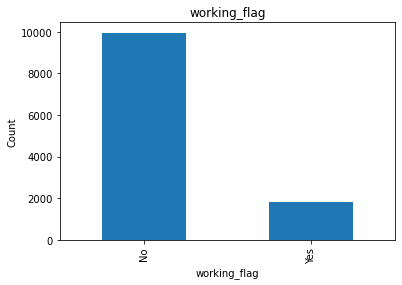

In [22]:
## Lets analyse the categorical values by creating histograms to understand the distribution

for feature in categorical_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'Taken_product')

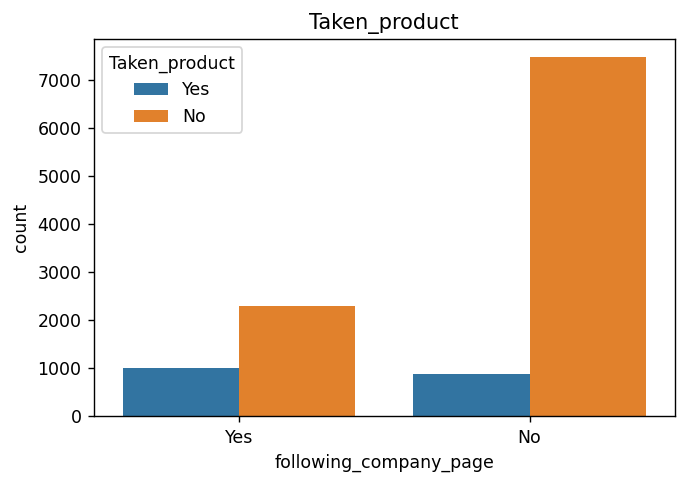

In [32]:
plt.figure(dpi=125)
sns.countplot(x = "following_company_page",  hue = "Taken_product", data =data).set_title('Taken_product')

Text(0.5, 1.0, 'Taken_product')

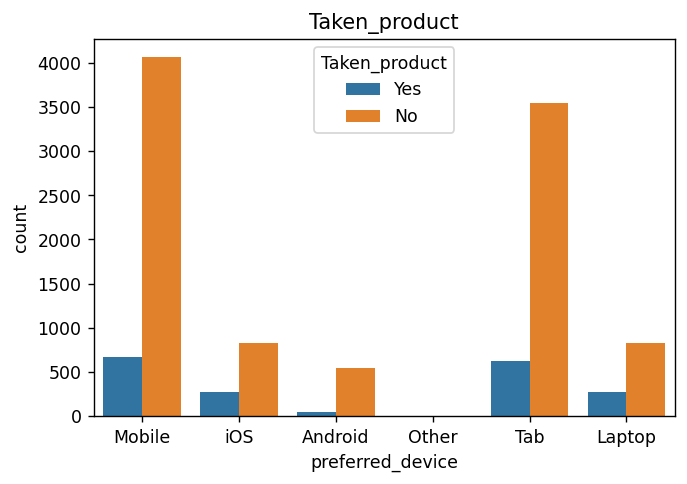

In [33]:
plt.figure(dpi=125)
sns.countplot(x = "preferred_device",  hue = "Taken_product", data =data).set_title('Taken_product')